In [1]:
#importdrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install gensim

In [3]:
import pandas as pd
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
import nltk
import gensim
from sklearn import metrics
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from collections import Counter
from nltk import FreqDist
import itertools
from sklearn.utils import class_weight
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from gensim.models import Word2Vec
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
%run '/content/drive/My Drive/OTHM AI/Deep Learning/RNN/feature_extractors.py'

Dataset Description - https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset

In [5]:
data_path = '/content/drive/My Drive/OTHM AI/Deep Learning/RNN/labeled_data.csv'
dataset = pd.read_csv(data_path)
dataset.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...



Here, we import two python scripts to do this cleaning part and the feature extractions. They are,


1.   normalization.py - Use for data cleaning part
2.   feature_extractors.py - Use for feature extractions

Data cleaning steps:


*   Lowercasing


*   Remove URL's and emails


*   Tokenization

*   Removal of Punctuation

*   Stop Word Removal

*   Lemmatization
*   Removal of Special Characters or Numbers


*   Remove one letter token


*   Check the number of duplicate records

*   Check for the missing values


In [6]:
porter = PorterStemmer()

documents = dataset['tweet']
Cleaned_doc = []
for r in range(len(documents)):
    review = documents[r]
    try:

        # Remove phrases starts with 'https'
        review = re.sub(r'http://\S+|https://\S+', '', review)

        review = re.sub(r'@\w+', '', review)

        # Remove emails
        review = re.sub(r'[\w\.-]+@[\w\.-]+', '', review)

        # removing everything except alphabets
        review = re.sub('[^A-Za-z]', ' ', review)

        # make all text lowercase
        review = review.lower()

        # apply tokenization
        Tokens = review.split()

        # removing short words
        Filtered_token = [w for w in Tokens if len(w)>3]
        review = ' '.join(Filtered_token)

    except:
        continue
    Cleaned_doc.append(review)

In [7]:
stop_words = stopwords.words('english')

# Remove Stop Words
for r in range(len(Cleaned_doc)):
    each_item = []
    for t in Cleaned_doc[r].split():
        if t not in stop_words:
             each_item.append(t)
    Cleaned_doc[r] = ' '.join(each_item)

In [8]:
dataset['Cleaned_text'] = Cleaned_doc
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house always take trash
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confused shit
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf right trash mine bible scriptures hymns
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna nigguh like aint fuckin
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,youu wild bitches tellin lies


In [9]:
dataset['tokenized_text'] = dataset['Cleaned_text'].apply(word_tokenize)

In [10]:
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda tokens: [re.sub(r'[^A-Za-z]', '', token) for token in tokens])

In [11]:
## Remove empty strings from the tweet column
dataset['tokenized_text'] = [[word for word in article if word != ''] for article in dataset['tokenized_text']]

In [12]:
# Remove One letter token
dataset['tokenized_text'] = dataset['tokenized_text'].apply(lambda tokens: [token for token in tokens if len(token) > 1])

In [13]:
## Check whether there any missing rows or not
dataset.isna().sum() ## No missing values in the dataset

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0
Cleaned_text,0
tokenized_text,0


In [14]:
## Check for the duplicates
dataset['Cleaned_text'].duplicated().sum()

1695

In [15]:
## Drop all the duplicates
dataset.drop_duplicates(subset = ['Cleaned_text'], inplace=True)

In [16]:
dataset = dataset.reset_index()
dataset = dataset.drop(columns = ['index' , 'Unnamed: 0'])
dataset

,count,hate_speech,offensive_language,neither,class,tweet,Cleaned_text,tokenized_text
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house always take trash,"[woman, complain, cleaning, house, always, tak..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,dats cold tyga cuffin place,"[dats, cold, tyga, cuffin, place]"
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start confused shit,"[dawg, ever, fuck, bitch, start, confused, shit]"
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,"[look, like, tranny]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told,"[shit, hear, might, true, might, faker, bitch,..."
...,...,...,...,...,...,...,...,...
23083,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf right trash mine bible scriptures hymns,"[muthaf, right, trash, mine, bible, scriptures..."
23084,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy,"[gone, broke, wrong, heart, baby, drove, redne..."
23085,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna nigguh like aint fuckin,"[young, buck, wan, na, nigguh, like, aint, fuc..."
23086,6,0,6,0,1,youu got wild bitches tellin you lies,youu wild bitches tellin lies,"[youu, wild, bitches, tellin, lies]"


### Word Frequency Analysis

In [17]:
# Flatten the list of tweet into a single list
articles = [word for sublist in dataset['tokenized_text'] for word in sublist]

# Count the frequency of each word
word_frequency = Counter(articles)

# Get the top 10 most common words
top_words = word_frequency.most_common(10)

# Print the top 10 words and their frequencies
for word, frequency in top_words:
    print(f"{word}: {frequency}")

bitch: 7708
bitches: 2959
like: 2723
hoes: 2210
pussy: 1980
fuck: 1342
shit: 1258
nigga: 1191
trash: 1095
know: 795


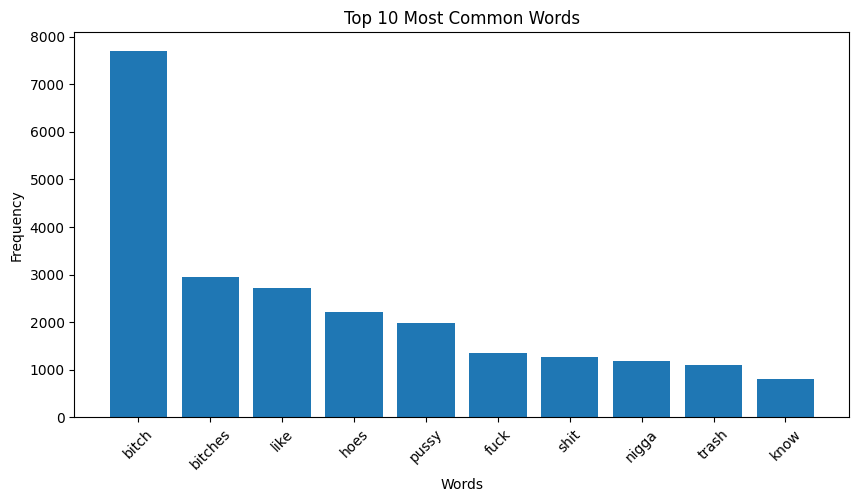

In [18]:
# Flatten the list of articles
flattened_list = list(itertools.chain.from_iterable(dataset['tokenized_text']))

# Calculate word frequency
freq_dist = FreqDist(flattened_list)

# Select top n words
top_words = freq_dist.most_common(10)

# Extract words and frequencies
words, frequencies = zip(*top_words)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-667262436.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=dataset, palette=custom_palette)
/tmp/ipython-input-667262436.py:10: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='class', data=dataset, palette=custom_palette)


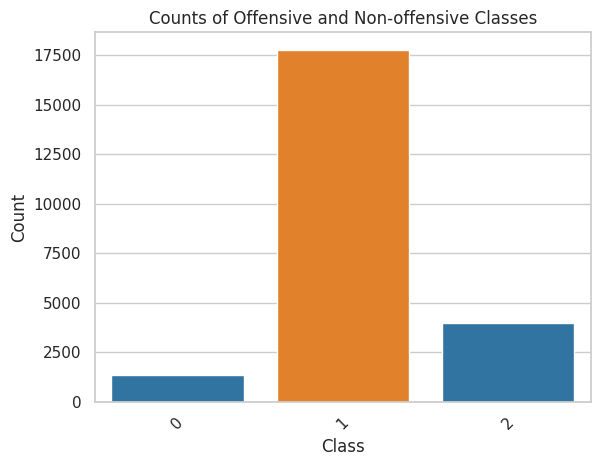

<Figure size 800x600 with 0 Axes>

In [19]:
import seaborn as sns

# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the countplot with the custom color palette
sns.countplot(x='class', data=dataset, palette=custom_palette)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Counts of Offensive and Non-offensive Classes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

In [20]:
dataset["updated_class"] = dataset["class"].replace({0: 1})

/tmp/ipython-input-2517254259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='updated_class', data=dataset, palette=custom_palette)


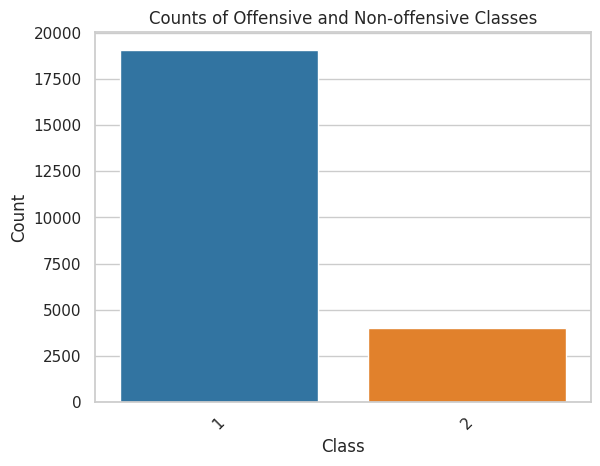

<Figure size 800x600 with 0 Axes>

In [21]:
# Define a custom color palette
custom_palette = ["#1f77b4", "#ff7f0e"]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the countplot with the custom color palette
sns.countplot(x='updated_class', data=dataset, palette=custom_palette)

# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Counts of Offensive and Non-offensive Classes")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set the figure size (width, height) in inches
plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

### Get unique Tokens

In [22]:
# Tokenize the dataset into words
all_tokens = [token for article in dataset['tokenized_text'] for token in article]

# Remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

# Filter tokens and count them
filtered_tokens = [token for token in all_tokens if token.lower() not in stop_words]
token_counter = Counter(filtered_tokens)

# Calculate dimensions
total_tokens = len(filtered_tokens)
unique_tokens = len(token_counter)

# Print the dimensions
print("Dimensions of the Article Collection:")
print(f"Total Tokens: {total_tokens}")
print(f"Unique Tokens: {unique_tokens}")
print('---')


Dimensions of the Article Collection:
Total Tokens: 142949
Unique Tokens: 18230
---


In [23]:
dataset['Cleaned_text'] = dataset['Cleaned_text'].astype(str)

### RNN Model

In [24]:
## Tokenize text
max_words = 10000  # Vocabulary size
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(dataset['Cleaned_text'])
sequences = tokenizer.texts_to_sequences(dataset['Cleaned_text'])

## Pad sequences
maxlen = 40  # Max sequence length (adjustable)
X = pad_sequences(sequences, maxlen=maxlen, padding='post')

## Encode labels
le = LabelEncoder()
y = le.fit_transform(dataset['updated_class'])

## Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
## Build SimpleRNN model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_shape=(maxlen,)))
model.add(SimpleRNN(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 40, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294,498 (4.94 MB)

 Trainable params: 1,294,498 (4.94 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
## Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8285 - loss: 0.4235 - val_accuracy: 0.8982 - val_loss: 0.2504
Epoch 2/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9246 - loss: 0.2024 - val_accuracy: 0.9066 - val_loss: 0.2451
Epoch 3/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9625 - loss: 0.1230 - val_accuracy: 0.9053 - val_loss: 0.2664
Epoch 4/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.9707 - loss: 0.0948 - val_accuracy: 0.8993 - val_loss: 0.3000
Epoch 5/5
231/231 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9654 - loss: 0.1025 - val_accuracy: 0.9036 - val_loss: 0.3342


In [32]:
# Evaluate on training data
train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss:', round(train_score[0], 4))
print('Train accuracy:', round(train_score[1], 4), '\n')

# Evaluate on test data
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', round(test_score[0], 4))
print('Test accuracy:', round(test_score[1], 4))

Train loss: 0.1221
Train accuracy: 0.9644 

Test loss: 0.3145
Test accuracy: 0.906


145/145 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94      3842
           2       0.72      0.72      0.72       776

    accuracy                           0.91      4618
   macro avg       0.83      0.83      0.83      4618
weighted avg       0.91      0.91      0.91      4618



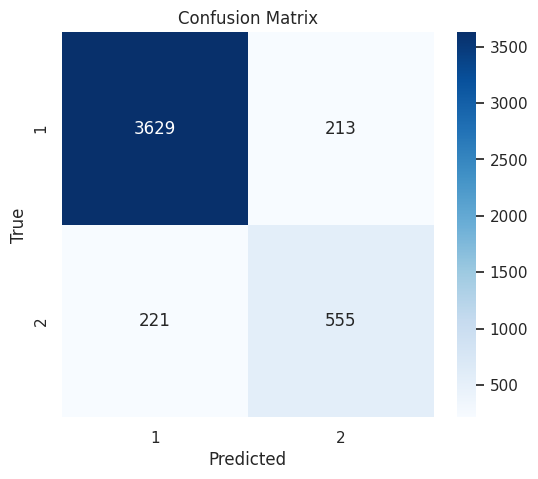

In [33]:
## Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

## Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))

## Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()